# Assignment-5: Mathematical Essay on Random Forest

**Author:**
AHMED SHMELS MUHE (GE22M009)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv('car_evaluation.csv',header = None)
labels = ['buying','maint','doors','persons','lug_boot','safety','target']
df.columns = labels
df.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Exploratory Data Analysis

In [ ]:
df.shape

(1728, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   target    1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,target
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,3,4,small,med,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
for col in df.columns:
    print(col,': ',*df[col].unique())

buying :  vhigh high med low
maint :  vhigh high med low
doors :  2 3 4 5more
persons :  2 4 more
lug_boot :  small med big
safety :  low med high
target :  unacc acc vgood good


**There are 6 features in the dataset and one target categorical variable. All the 6 features are categorical too**

## Missing Values?

In [ ]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
target      object
dtype: object

In [ ]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
target      0
dtype: int64

In [ ]:
for col in df.columns:
    print(col,': ',*df[col].unique())

buying :  vhigh high med low
maint :  vhigh high med low
doors :  2 3 4 5more
persons :  2 4 more
lug_boot :  small med big
safety :  low med high
target :  unacc acc vgood good


No missing valuess, yaayy. lessgo

## Visualization

**1) Imbalanced Dataset**

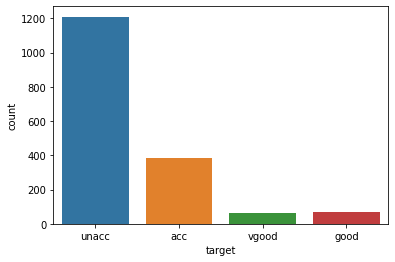

In [ ]:
sns.countplot(data = df, x='target')
plt.grid(False)
plt.savefig('ImbalancedDataset')
plt.show()

In [ ]:
print('Unacc: ',(df['target']=='unacc').sum())
print('Acc:   ',(df['target']=='acc').sum())
print('Good:  ',(df['target']=='good').sum())
print('VGood: ',(df['target']=='vgood').sum())

Unacc:  1210
Acc:    384
Good:   69
VGood:  65


The dataset seems imbalanced. We'll determine weights to adjust for the imbalances by learning from the dataset.

**2) Features**

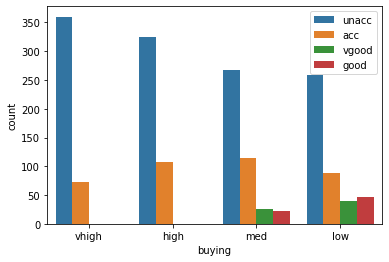

In [ ]:
sns.countplot(data=df, x = 'buying',hue = 'target')
plt.grid(False)
plt.legend()
plt.savefig('Buying')
plt.show()

1) Most cars falls under unaccountable category.  
2) Cars that have high and vhigh buying prices are generally unaccountable while the low priced cars consists of all 4 categories

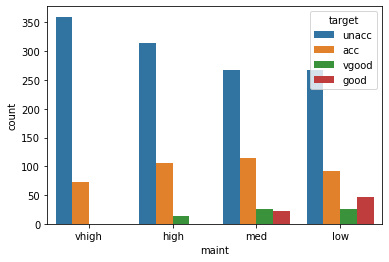

In [ ]:
sns.countplot(data=df, x = 'maint',hue = 'target')
plt.grid(False)
plt.savefig('Maintenance')
plt.show()

- Cars with vhigh maintainence are unaccountable largely. No good and vgood cars are present with vhigh maintenance. 

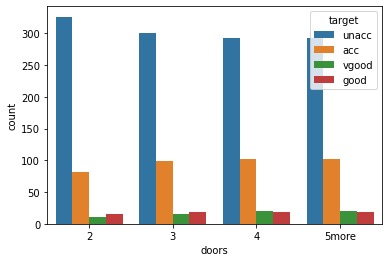

In [ ]:
sns.countplot(data=df, x = 'doors',hue = 'target')
plt.grid(False)
plt.savefig('Doors')
plt.show()

- Almost all categories have similar distributions. Number of doors doesn't seem to be a crucial criteria that could distinguish.

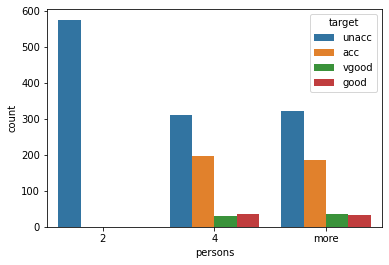

In [ ]:
sns.countplot(data=df, x = 'persons',hue = 'target')
plt.grid(False)
plt.savefig('Persons')
plt.show()

- Cars that have only 2 person capacity are unaccountable. 
- 4 and 4 plus have similar reviews

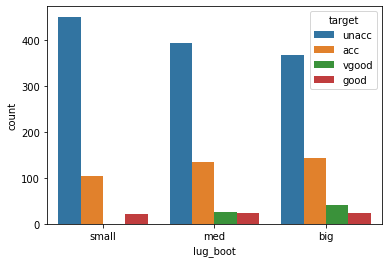

In [ ]:
sns.countplot(data=df, x = 'lug_boot',hue = 'target')
plt.grid(False)
plt.savefig('lug_boot')
plt.show()

- Cars which have small lug_boot are never vgood. 
- There has been mixed reviews across cars which have medium to big luggage. However, a trend of bigger space and higher ratings are seen.

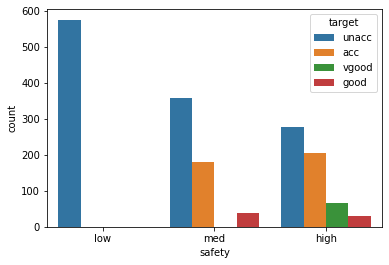

In [ ]:
sns.countplot(data=df, x = 'safety',hue = 'target')
plt.grid(False)
plt.savefig('Safety')
plt.show()

Safety seems to play a major role. 
- Every car which have a estimated low safety are unaccountable.
- No cars are classified as vgood which have medium or low safety.
- A mixed reviews are seen across cars which were classified as high safety. 

## Feature Engineering and Data Split

In [ ]:
d1 = {'vhigh':3,
     'high':2,
     'med':1,
     'low':0}

d2 = {'big':2,
     'med':1,
     'small':0}

d3 = {'high':2,
     'med':1,
     'low':0}

d4= {"unacc":0,
    "acc":1,
    "good":2,
    "vgood":3}

d5={"2":0,
    "4":1,
    "more":2}

d6={"2":0,
    "3":1,
    "4":2,
    "5more":3}

### Ordinal Encoding: 

The feature columns are categorical but is ordinal. Since they hold an order, we choose to do an Label Encoding instead of an One-hot Encoding. 

In [ ]:
df['buying'] = df['buying'].map(d1)
df['maint'] = df['maint'].map(d1)
df['doors'] = df['doors'].map(d6)
df['persons'] = df['persons'].map(d5)
df['lug_boot'] = df['lug_boot'].map(d2)
df['safety'] = df['safety'].map(d3)
df['target'] = df['target'].map(d4)

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0


In [ ]:
# check the data types after transformation
df.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
target      int64
dtype: object

In [ ]:
# checking for missing values once again
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
target      0
dtype: int64

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('target',axis = 1)
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state = 42)
X_cval,X_test,y_cval,y_test = train_test_split(X_test,y_test,test_size = 0.5, random_state = 42)

In [ ]:
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace  = True)
X_cval.reset_index(drop = True, inplace  = True)
y_train = y_train.values.reshape((-1,))
y_test = y_test.values.reshape((-1,))
y_cval = y_cval.values.reshape((-1,))

In [ ]:
X_train.shape, y_train.shape,  X_test.shape, y_test.shape, X_cval.shape, y_cval.shape

((1036, 6), (1036,), (346, 6), (346,), (346, 6), (346,))

In [ ]:
X_trainfull = pd.concat([X_train,X_cval])
y_trainfull = np.concatenate((y_train,y_cval),axis= 0)

X_trainfull.reset_index(drop = True, inplace  = True)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score, accuracy_score, plot_confusion_matrix

## Number of trees versus error (OOB and Test error)

## Bagged Trees

In this, we'll attempt to bag B unpruned overfit trees (without random feature selection) and try if that increases accuracy

In [ ]:
clf0_rfs = [] 
no_of_trees = range(10,1000,10)

for tree in no_of_trees:
    clf_rf = RandomForestClassifier(class_weight = 'balanced', 
                                    random_state = 42, n_estimators = tree,
                                    oob_score = True, max_samples = 0.66, max_features = None, n_jobs = -1) 
    clf_rf.fit(X_train,y_train)
    clf0_rfs.append(clf_rf)
        

C:\Users\VIGNESH S\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\VIGNESH S\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [ ]:
oob0_scores = [clf_rf.oob_score_ for clf_rf in clf0_rfs]
cval0_scores = [clf_rf.score(X_test,y_test) for clf_rf in clf0_rfs]

In [ ]:
oob0_scores = 1- np.array(oob0_scores)
cval0_scores = 1- np.array(cval0_scores)

## Random Forest

In [ ]:
clf1_rfs = [] 
no_of_trees = range(10,1000,10)

for tree in no_of_trees:
    clf_rf = RandomForestClassifier(class_weight = 'balanced', 
                                    random_state = 42, n_estimators = tree,
                                    oob_score = True, max_samples = 0.66, max_features = 'sqrt', n_jobs = -1) 
    clf_rf.fit(X_train,y_train)
    clf1_rfs.append(clf_rf)
        

C:\Users\VIGNESH S\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\VIGNESH S\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [ ]:
oob1_scores = [clf_rf.oob_score_ for clf_rf in clf1_rfs]
cval1_scores = [clf_rf.score(X_test,y_test) for clf_rf in clf1_rfs]

In [ ]:
oob1_scores = 1- np.array(oob1_scores)
cval1_scores = 1- np.array(cval1_scores)

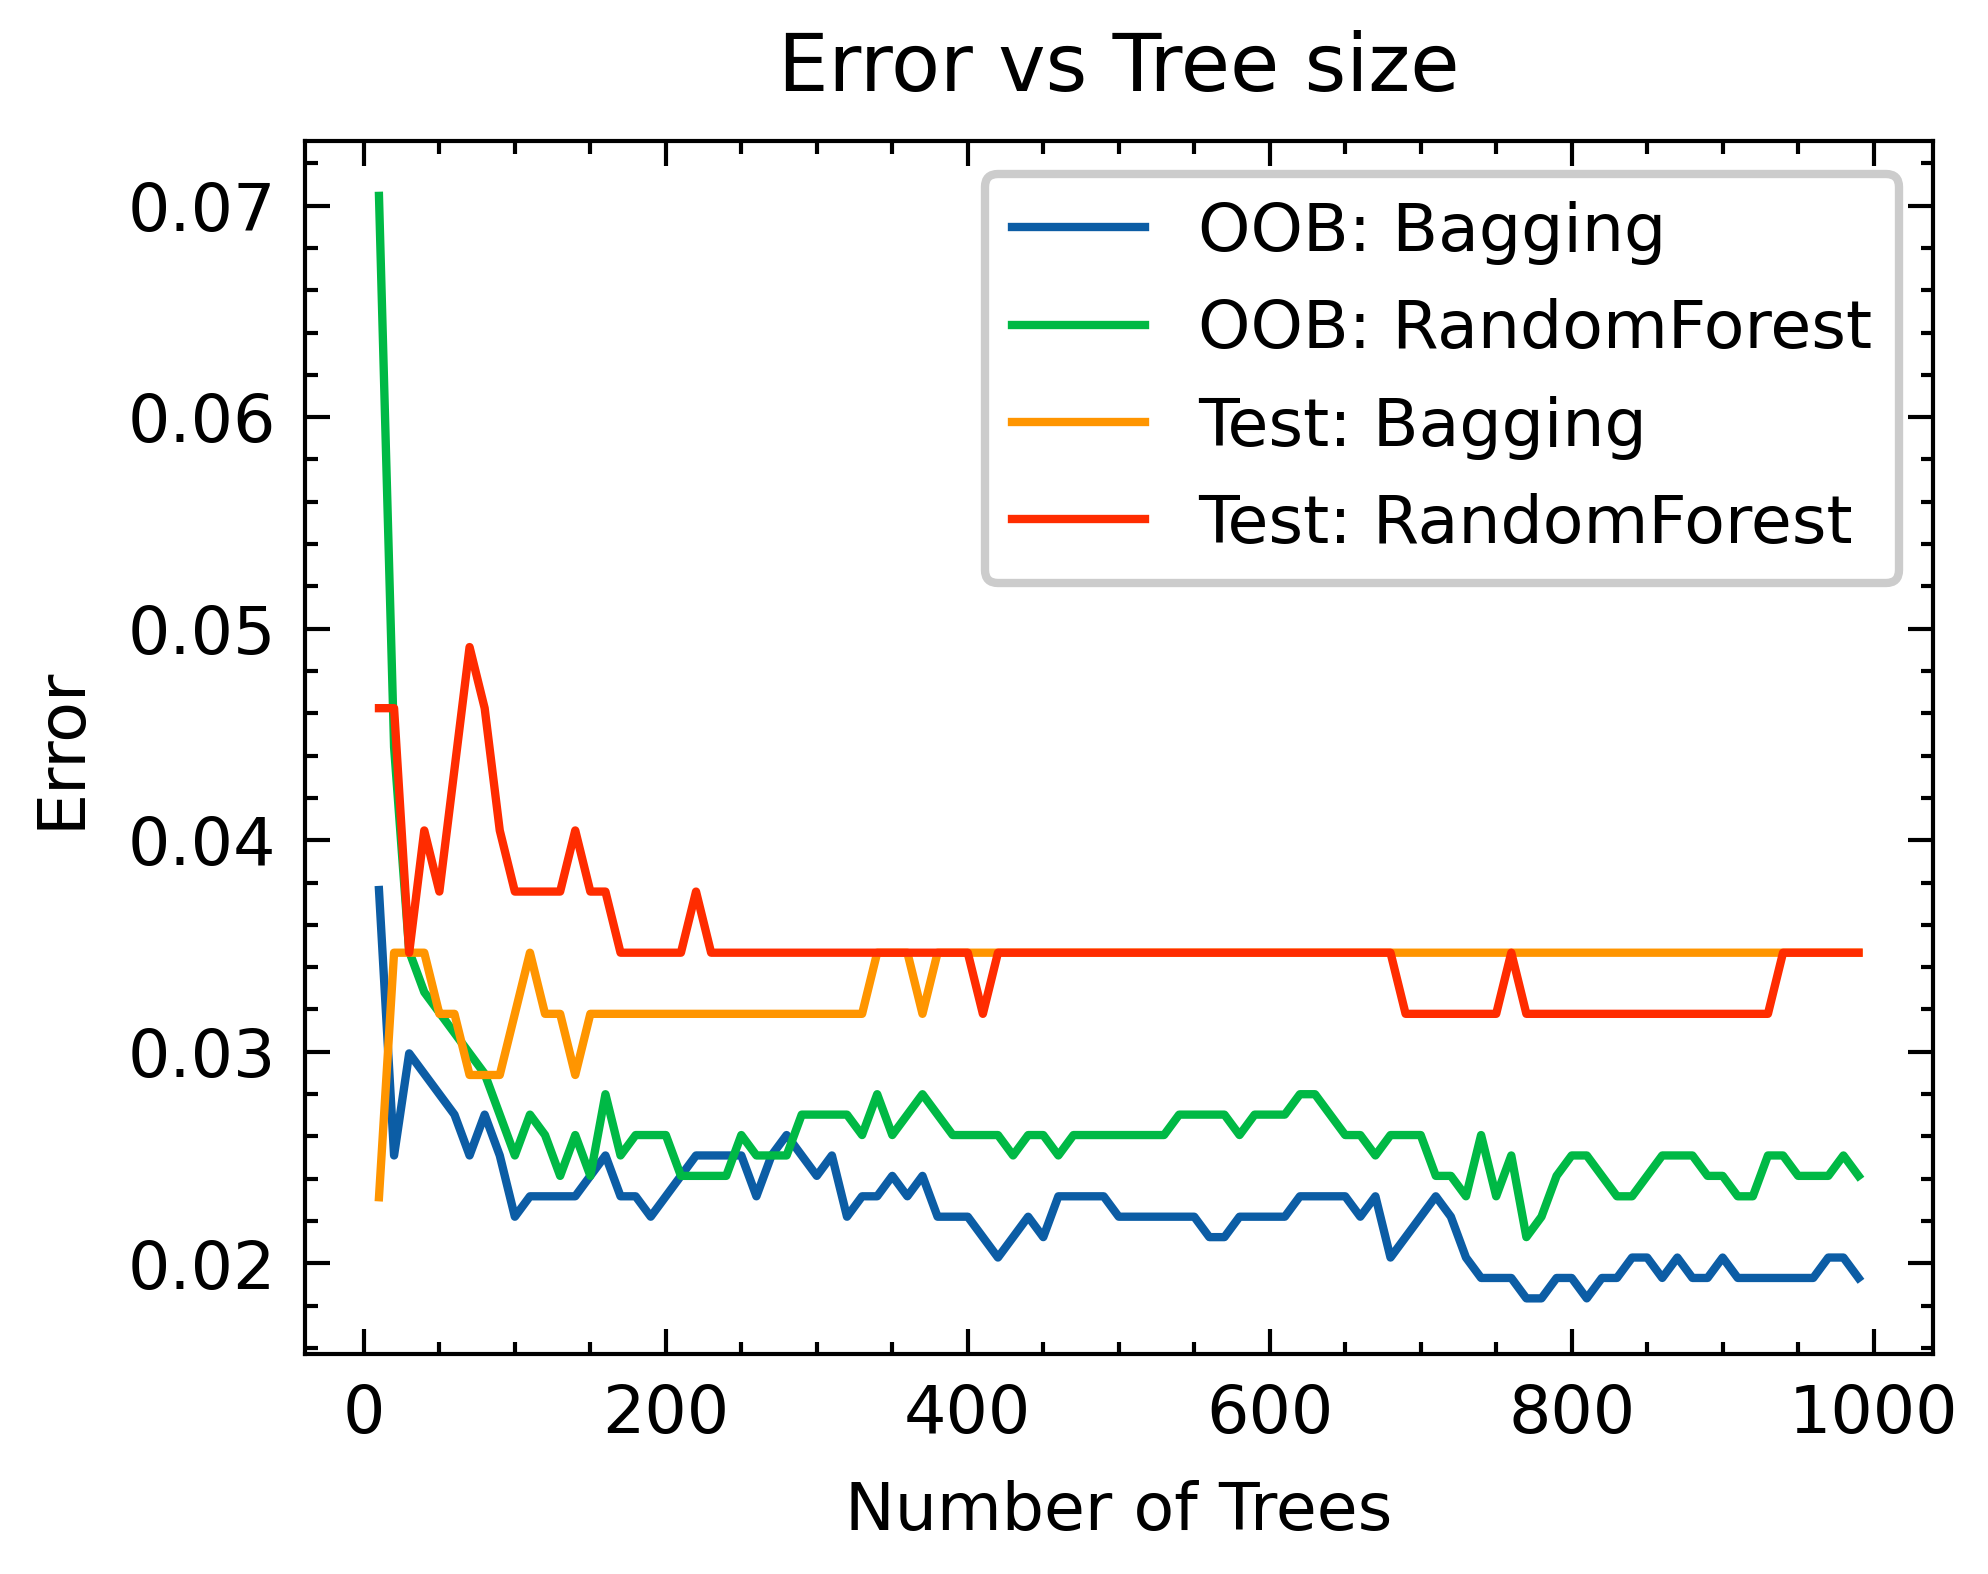

In [ ]:
fig,ax = plt.subplots()
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Error')
ax.set_title('Error vs Tree size')
ax.plot(no_of_trees, oob0_scores, label='OOB: Bagging')
ax.plot(no_of_trees, oob1_scores, label='OOB: RandomForest')
ax.plot(no_of_trees, cval0_scores, label='Test: Bagging')
ax.plot(no_of_trees, cval1_scores, label='Test: RandomForest',)
ax.legend()
plt.grid(False)
plt.savefig('clf0 accvstreesize hd')
plt.show()

In [ ]:
df_trainfull = X_train.copy()
df_trainfull['target'] = y_train

## Actual Model

250 trees is good enough from the above plot. 
Grid Search cv over number of features during random selection is done below 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [250],
    'class_weight': ['balanced'],
    'max_samples': [0.66],
    'max_features': list(range(1,len(labels)))
}

In [ ]:
rf_gs = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [ ]:
rf_gs.fit(X_trainfull, y_trainfull)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'max_samples': [0.66], 'n_estimators': [250]},
             verbose=2)

In [ ]:
print(rf_gs.best_params_)

{'class_weight': 'balanced', 'max_features': 6, 'max_samples': 0.66, 'n_estimators': 250}


In [ ]:
clf_best = rf_gs.best_estimator_

In [ ]:
from sklearn.metrics import classification_report

## Model Evaluation

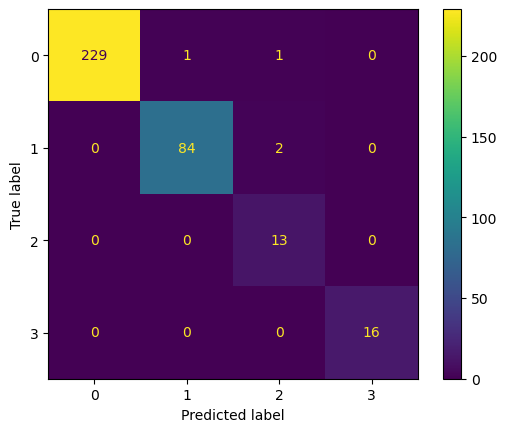

In [ ]:
plot_confusion_matrix(clf_best,X_test,y_test)
plt.grid(False)
plt.savefig('clf_best_cm')
plt.show()

In [ ]:
tbl_best = classification_report(y_test, clf_best.predict(X_test),output_dict=True)
pd.DataFrame(tbl_best)

,0,1,2,3,accuracy,macro avg,weighted avg
precision,1.000000,0.988235,0.812500,1.0,0.988439,0.950184,0.990031
recall,0.991342,0.976744,1.000000,1.0,0.988439,0.992022,0.988439
f1-score,0.995652,0.982456,0.896552,1.0,0.988439,0.968665,0.988850
support,231.000000,86.000000,13.000000,16.0,0.988439,346.000000,346.000000


In [ ]:
d4= {"unacc":0,
    "acc":1,
    "good":2,
    "vgood":3}

In [ ]:
feature_imp = pd.Series(clf_best.feature_importances_,index=X_trainfull.columns).sort_values(ascending=False)
feature_imp

safety      0.246450
maint       0.202295
lug_boot    0.189981
buying      0.169422
persons     0.144123
doors       0.047728
dtype: float64

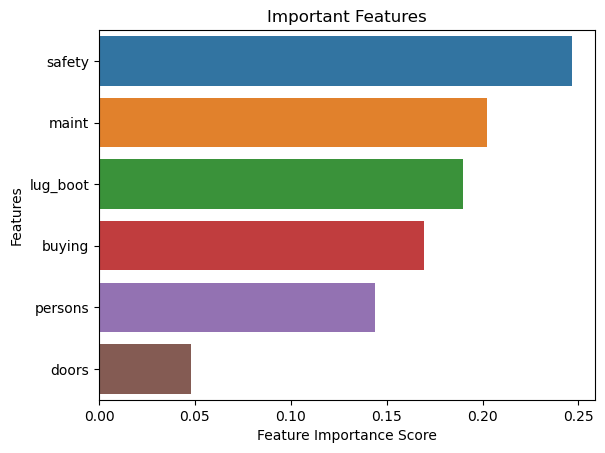

In [ ]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.grid(False)
plt.savefig('feature_imp')
plt.show()

Agrees with our countplot intuition